<a href="https://colab.research.google.com/github/fadhan654/latihan1/blob/main/Watermark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.9 MB/s eta 0:00:00
Upload gambar untuk enkripsi:


Saving Szoboszlai.jpg to Szoboszlai.jpg
Gambar asli:


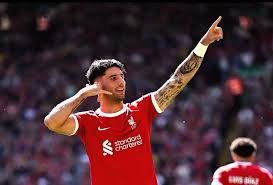

Gambar dengan Watermark:


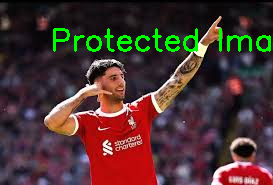

Gambar terenkripsi:


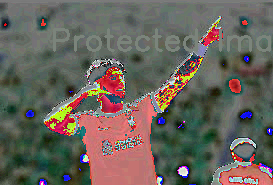

Gambar didekripsi:


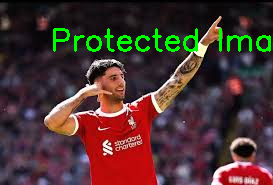

Semua gambar telah disimpan.


In [1]:
# Install library tambahan jika belum terpasang
!pip install pycryptodome

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# Fungsi untuk mengenkripsi gambar menggunakan XOR
def xor_encrypt_decrypt(image, key):
    # Membuat kunci yang seukuran dengan gambar
    key_matrix = np.full(image.shape, key, dtype=np.uint8)
    # Menggunakan XOR untuk enkripsi/dekripsi
    encrypted_image = cv2.bitwise_xor(image, key_matrix)
    return encrypted_image

# Fungsi untuk menambahkan watermark teks pada gambar
def add_text_watermark(image, text="Watermark", position=(50, 50), font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=1, color=(0, 255, 0), thickness=2):
    watermarked_image = image.copy()
    cv2.putText(watermarked_image, text, position, font, font_scale, color, thickness)
    return watermarked_image

# Fungsi untuk menambahkan watermark gambar pada gambar utama
def add_image_watermark(image, watermark_path, position=(0, 0)):
    watermark = cv2.imread(watermark_path, cv2.IMREAD_UNCHANGED)
    overlay = image.copy()

    # Resize watermark jika terlalu besar
    (wH, wW) = watermark.shape[:2]
    scale = min(image.shape[1] / wW, image.shape[0] / wH, 0.25)
    watermark = cv2.resize(watermark, (int(wW * scale), int(wH * scale)))

    # Tempelkan watermark di posisi tertentu
    x, y = position
    overlay[y:y+watermark.shape[0], x:x+watermark.shape[1]] = watermark
    return overlay

# Upload gambar untuk enkripsi
print("Upload gambar untuk enkripsi:")
uploaded_image = files.upload()
image_path = list(uploaded_image.keys())[0]
image = cv2.imread(image_path)

# Tampilkan gambar asli
print("Gambar asli:")
cv2_imshow(image)

# Tambahkan watermark teks pada gambar asli
watermarked_image = add_text_watermark(image, text="Protected Image")
print("Gambar dengan Watermark:")
cv2_imshow(watermarked_image)

# Enkripsi gambar dengan watermark
key = 123  # Kunci sederhana
encrypted_image = xor_encrypt_decrypt(watermarked_image, key)
print("Gambar terenkripsi:")
cv2_imshow(encrypted_image)

# Dekripsi gambar
decrypted_image = xor_encrypt_decrypt(encrypted_image, key)
print("Gambar didekripsi:")
cv2_imshow(decrypted_image)

# Simpan semua hasil
cv2.imwrite("original_image.jpg", image)
cv2.imwrite("watermarked_image.jpg", watermarked_image)
cv2.imwrite("encrypted_image.jpg", encrypted_image)
cv2.imwrite("decrypted_image.jpg", decrypted_image)
print("Semua gambar telah disimpan.")
